## Визуализация результатов кластеризации

In [1]:
import os
import pandas as pd

os.chdir('../../../')

In [2]:
df_clusters = pd.read_csv('data/lmsys-chat-1m/processed/kmeans_clusters.csv')
X_vis = df_clusters.drop(columns=['user_id', 'cluster'])

### Визуализация, PCA


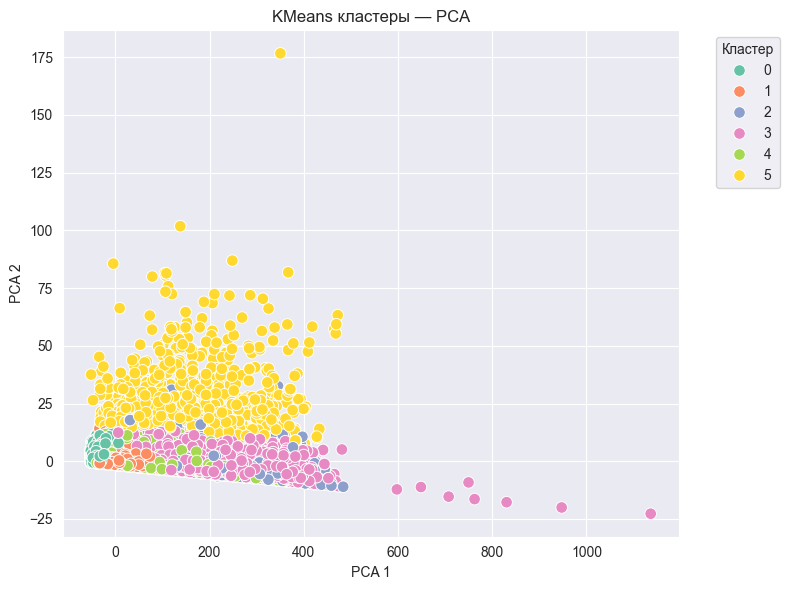

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_vis)

df_clusters_pca = df_clusters.copy()
df_clusters_pca['pca1'] = X_pca[:, 0]
df_clusters_pca['pca2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_clusters_pca,
    x='pca1',
    y='pca2',
    hue='cluster',
    palette='Set2',
    s=70
)
plt.title("KMeans кластеры — PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Кластер", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


### Визуализация, UMAP

C:\Users\hqdem\PythonProjects\user-pattern-analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\hqdem\PythonProjects\user-pattern-analysis\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\hqdem\PythonProjects\user-pattern-analysis\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(n_jobs=1, random_state=42, verbose=True)
Thu Apr 17 17:34:44 2025 Construct fuzzy simplicial set
Thu Apr 17 17:34:44 2025 Finding Nearest Neighbors
Thu Apr 17 17:34:44 2025 Building RP forest with 23 trees
Thu Apr 17 17:34:49 2025 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	Stopping threshold met -- exiting after 2 iterations
Thu Apr 17 17:35:03 2025 Finished Nearest Neighbor Search
Thu Apr 17 17:35:06 2025 Construct embedding


C:\Users\hqdem\PythonProjects\user-pattern-analysis\.venv\Lib\site-packages\umap\spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
Epochs completed:   1%|            2/200 [00:00]

	completed  0  /  200 epochs


Epochs completed:  10%| █          21/200 [00:09]

	completed  20  /  200 epochs


Epochs completed:  20%| ██         41/200 [00:18]

	completed  40  /  200 epochs


Epochs completed:  30%| ███        61/200 [00:27]

	completed  60  /  200 epochs


Epochs completed:  40%| ████       81/200 [00:36]

	completed  80  /  200 epochs


Epochs completed:  50%| █████      101/200 [00:45]

	completed  100  /  200 epochs


Epochs completed:  60%| ██████     121/200 [00:54]

	completed  120  /  200 epochs


Epochs completed:  71%| ███████    142/200 [01:03]

	completed  140  /  200 epochs


Epochs completed:  80%| ████████   161/200 [01:12]

	completed  160  /  200 epochs


Epochs completed:  91%| █████████  182/200 [01:21]

	completed  180  /  200 epochs


Epochs completed: 100%| ██████████ 200/200 [01:29]


Thu Apr 17 17:39:35 2025 Finished embedding


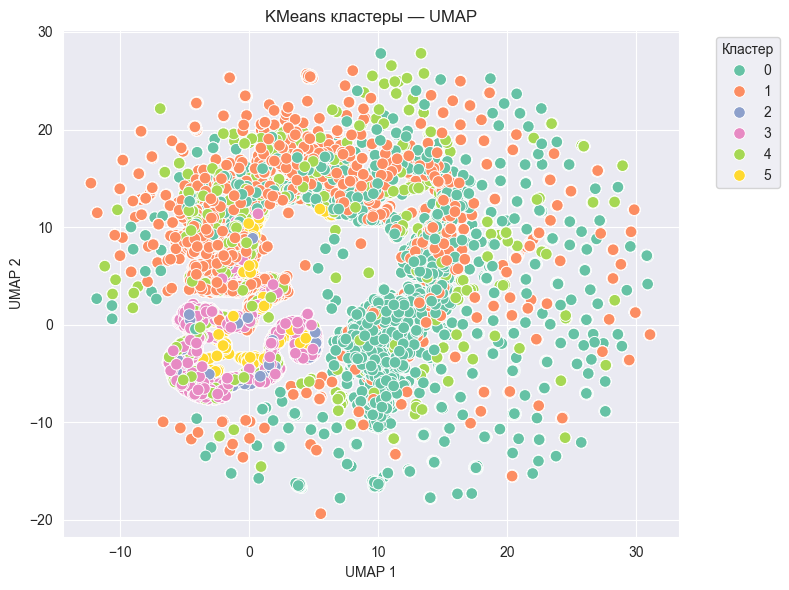

In [4]:
import umap.umap_ as umap

reducer = umap.UMAP(n_components=2, random_state=42, verbose=True)
X_umap = reducer.fit_transform(X_vis)

df_clusters_umap = df_clusters.copy()
df_clusters_umap['umap1'] = X_umap[:, 0]
df_clusters_umap['umap2'] = X_umap[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_clusters_umap,
    x='umap1',
    y='umap2',
    hue='cluster',
    palette='Set2',
    s=70
)
plt.title("KMeans кластеры — UMAP")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Кластер", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


### barplot-анализ признаков внутри кластеров

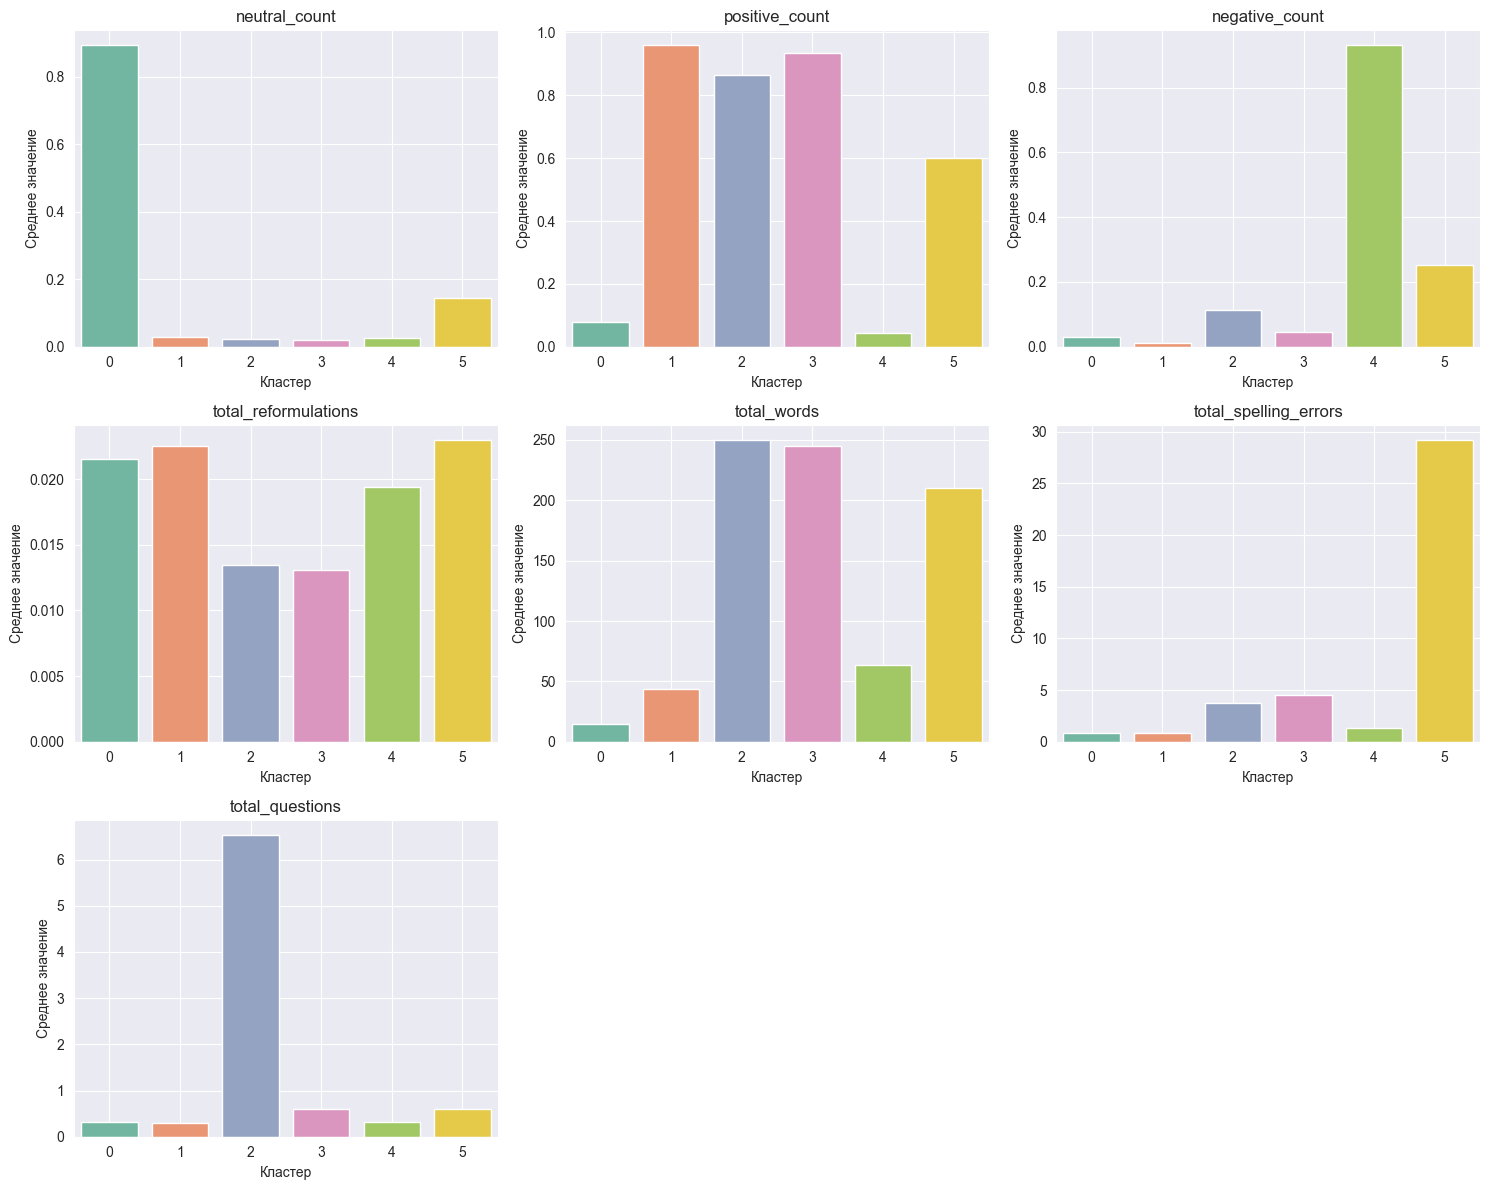

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

features = [
    'neutral_count',
    'positive_count',
    'negative_count',
    'total_reformulations',
    'total_words',
    'total_spelling_errors',
    'total_questions'
]

df_cluster_means = df_clusters.groupby('cluster')[features].mean().reset_index()

n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols  # округление вверх

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.barplot(
        data=df_cluster_means,
        x='cluster',
        y=feature,
        hue='cluster',
        legend=False,
        palette='Set2'
    )
    plt.title(f"{feature}")
    plt.xlabel("Кластер")
    plt.ylabel("Среднее значение")
    plt.grid(True)

plt.tight_layout()
plt.show()


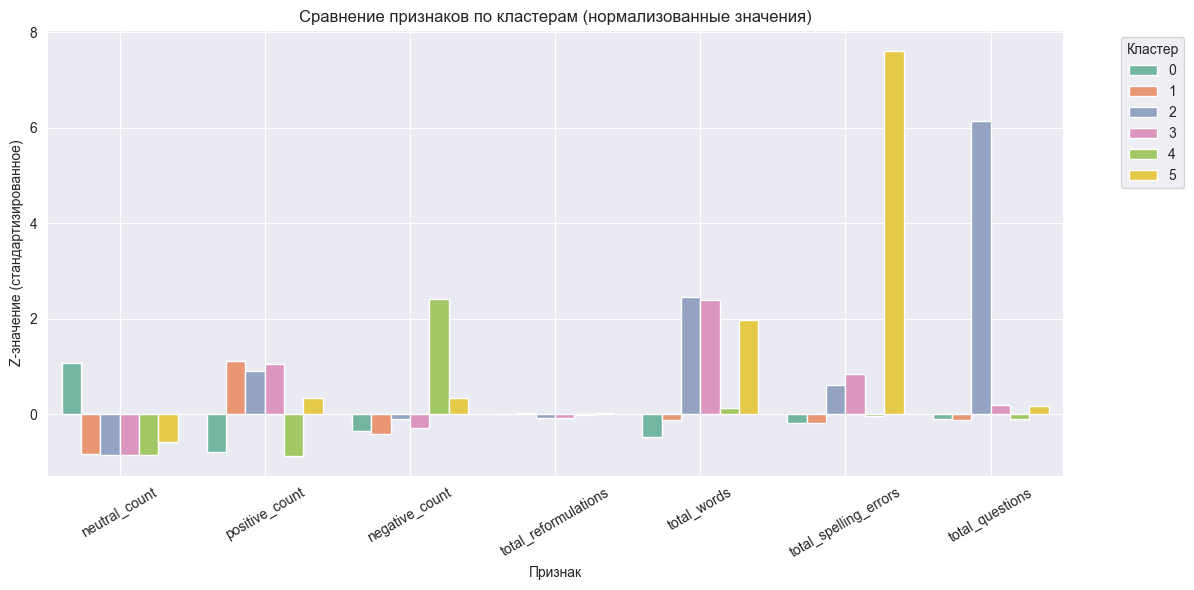

In [7]:
from sklearn.preprocessing import StandardScaler

features = [
    'neutral_count',
    'positive_count',
    'negative_count',
    'total_reformulations',
    'total_words',
    'total_spelling_errors',
    'total_questions'
]

df_standardized = df_clusters.copy()
scaler = StandardScaler()
df_standardized[features] = scaler.fit_transform(df_standardized[features])

df_cluster_means = df_standardized.groupby('cluster')[features].mean().reset_index()
df_melted = df_cluster_means.melt(id_vars='cluster', value_vars=features,
                                  var_name='feature', value_name='value')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='feature', y='value', hue='cluster', palette='Set2')
plt.title("Сравнение признаков по кластерам (нормализованные значения)")
plt.xlabel("Признак")
plt.ylabel("Z-значение (стандартизированное)")
plt.xticks(rotation=30)
plt.legend(title="Кластер", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np

features = [
    'neutral_count',
    'positive_count',
    'negative_count',
    'total_reformulations',
    'total_words',
    'total_spelling_errors',
    'total_questions'
]

df_std = df_clusters.copy()
scaler = StandardScaler()
df_std[features] = scaler.fit_transform(df_std[features])

df_cluster_means_std = df_std.groupby('cluster')[features].mean().reset_index()


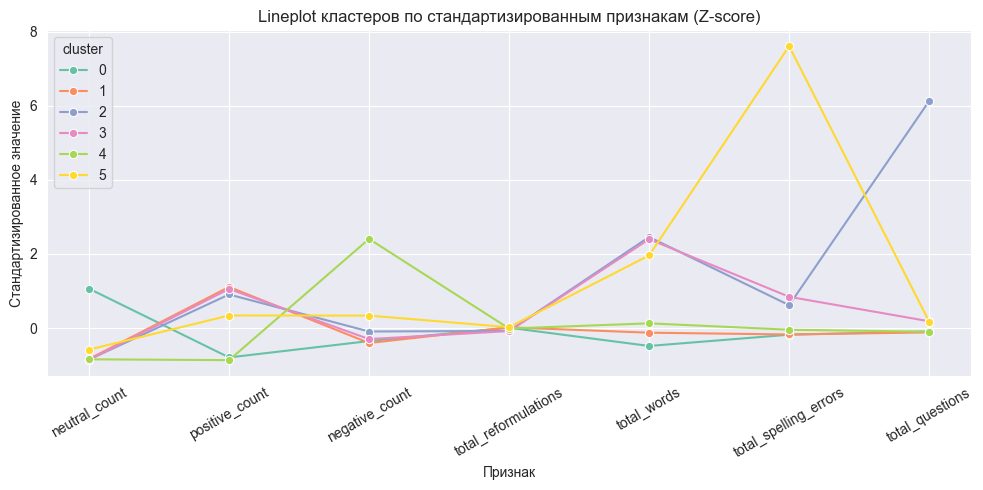

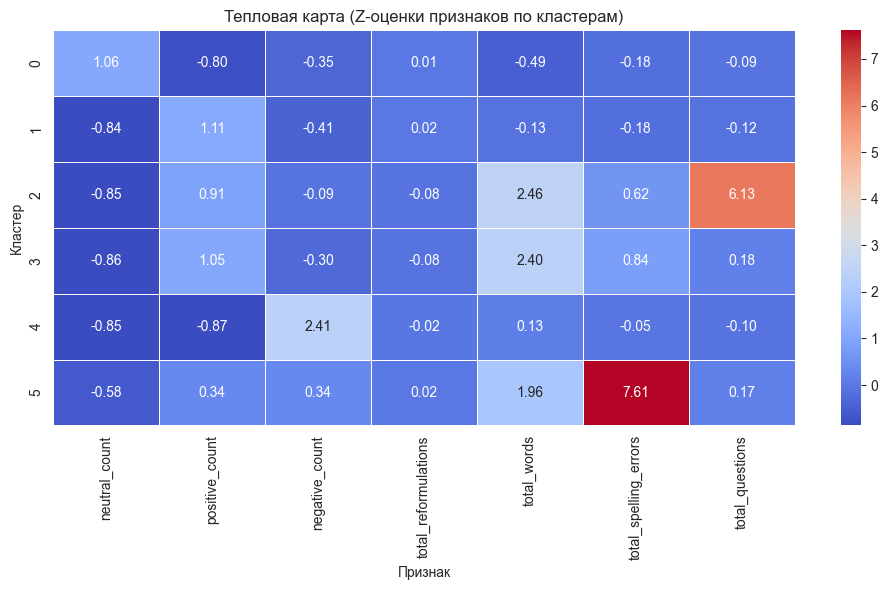

In [9]:
# LINEPLOT
df_melted_std = df_cluster_means_std.melt(id_vars='cluster', value_vars=features,
                                           var_name='feature', value_name='value')

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_melted_std, x='feature', y='value', hue='cluster', marker='o', palette='Set2')
plt.title("Lineplot кластеров по стандартизированным признакам (Z-score)")
plt.xlabel("Признак")
plt.ylabel("Стандартизированное значение")
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()

# HEATMAP
heat_data = df_cluster_means_std.set_index('cluster')

plt.figure(figsize=(10, 6))
sns.heatmap(heat_data, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Тепловая карта (Z-оценки признаков по кластерам)")
plt.xlabel("Признак")
plt.ylabel("Кластер")
plt.tight_layout()
plt.show()


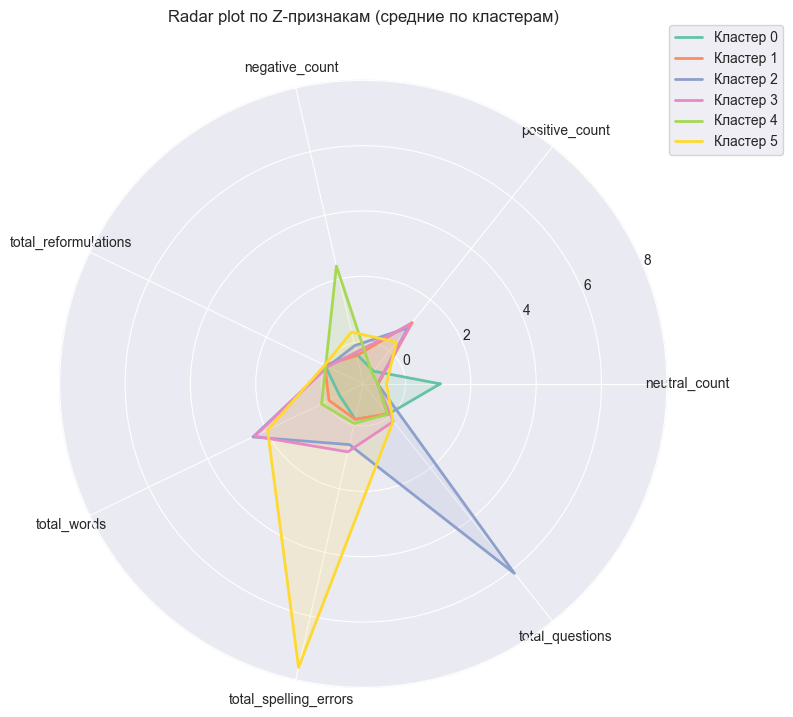

In [10]:
# RADAR PLOT
categories = features
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
colors = sns.color_palette("Set2", n_colors=len(df_cluster_means_std))

for idx, row in df_cluster_means_std.iterrows():
    values = row[features].tolist()
    values += values[:1]
    ax.plot(angles, values, color=colors[idx], linewidth=2, label=f"Кластер {int(row['cluster'])}")
    ax.fill(angles, values, color=colors[idx], alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title("Radar plot по Z-признакам (средние по кластерам)", y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()


### Интерпретация кластеров

Кластер 0 — Нейтральные, молчаливые
- Очень высокий neutral_count (больше 0.9)
- Очень высокий total_reformulations
- Очень низкие total_words, questions

Фактически, пользователи почти не выражают эмоций, пишут мало, не переспрашивают.

Возможная интерпретация: «Короткие, сдержанные, лаконичные пользователи, которые просто пишут что-то типа ok / yes / cool»

------

Кластер 1 — Позитивные, краткие
- Высокий positive_count
- Низкие negative_count, spelling_errors, words
- reformulations выше среднего

Возможная интерпретация: «Позитивно окрашенные, краткие сообщения, возможно эмоциональные, но без глубоких рассуждений. Часто что-то пересказывают или уточняют»

------

Кластер 2 — Вопросительные и многословные
- Сильно завышен total_questions
- Высокие positive_count, total_words
- reformulations средние

Возможная интерпретация: «Активные спрашивающие пользователи. Пишут длинно, задают много вопросов — возможно, ищут ответы, тестируют границы модели, решают задачи»

------

Кластер 3 — Вовлечённые, позитивно-рациональные
- Высокий positive_count, total_words, умеренный reformulations
- Всё остальное сбалансировано

Возможная интерпретация: «Рациональные, развернутые и позитивные диалоги. Пользователи, ведущие активную, но адекватную коммуникацию»

------

Кластер 4 — Негативные, с ошибками
- Очень высокий negative_count
- Среднее число слов, высокий reformulations
- Мало вопросов

Возможная интерпретация: «Кластер с негативной окраской. Возможно, пользователи раздражены или неправильно задают вопросы»

------

Кластер 5 — Переобъясняющие, путаные
- Высокие: spelling_errors, reformulations, positive_count, negative_count, words

Они и эмоциональны, и объясняют, и делают ошибки

Возможная интерпретация: «Сложный кластер. Пользователи, которым тяжело сформулировать мысль, они переписываются, часто ошибаются и ведут путаный диалог. Возможно, дают слишком много контекста»

### Примеры сообщений от пользователей для разных кластеров

In [20]:
df_dialogs = pd.read_csv('data/lmsys-chat-1m/processed/dialogs.csv')


df_dialogs_with_clusters = df_dialogs.merge(
    df_clusters[['user_id', 'cluster']],
    on='user_id',
    how='inner'
)

for cluster_id in sorted(df_dialogs_with_clusters['cluster'].unique()):
    print(f"\n{'='*60}")
    print(f"🧠 КЛАСТЕР {cluster_id}")
    print(f"{'='*60}")

    sample = df_dialogs_with_clusters[df_dialogs_with_clusters['cluster'] == cluster_id]
    sample = sample.sample(n=5, random_state=42) if len(sample) >= 5 else sample

    for i, row in sample.iterrows():
        print(f"- Пользователь {row['user_id']}: {row['user_message']}")



🧠 КЛАСТЕР 0
- Пользователь 82427: Predict all missing variables based on current knowledgebase.
- Пользователь 103394: Are wolves canines?
- Пользователь 61036: where is radioButton1 defined?
- Пользователь 23794: Isn't nitrogen a "noble gas"? How can it react with other gases?
- Пользователь 24875: continue

🧠 КЛАСТЕР 1
- Пользователь 81168: NAME_1 would like to rebrand to a manosphere guru, give me some sample brand names
- Пользователь 121879: There was a boat, called the Lucky Strike.  Some of the letters wore off over time, left was "Lucy St. Rike"  give other examples of boat names in this style or similar.
- Пользователь 75224: Why would she pee a little when seeing me? That makes no sense
- Пользователь 73676: What's the population of Scotland? Take that number and divide it by the number of members in the Scottish Parliament. Take the result and multiply it by the population of California. Show your work, if possible. 
- Пользователь 42175: Interesting stuff do it lol

🧠 КЛАС